In [1]:
from qutip import *
from latticeclass import *
import numpy as np

In the unit cell:  
Number of orbitals:  2
On-site energies of the orbitals:   [0.0, 0.0]
Vectors representing the positions of the orbitals:   [[0.0, 0, 0], [0.6666666666666666, -0.3333333333333333]]
The hoppings within the unit cell:  [[0, 1, -1.0]]
The minimum dimension:  2
In the unit cell:  
Number of orbitals:  2
On-site energies of the orbitals:   [0.0, 0.0]
Vectors representing the positions of the orbitals:   [[0.0, 0, 0], [0.6666666666666666, -0.3333333333333333]]
The hoppings within the unit cell:  [[0, 1, -1.0]]
The minimum dimension:  2
The basis vector array:  [[0.8660254037844386, 0.5], [0.8660254037844386, -0.5]]
The inter hopping array:  [(0, 1, -1.0, (-1, 0)), (0, 1, -1.0, (-1, 1)), (0, 0, (9.184850993605149e-18+0.15j), (0, -1)), (1, 1, (9.184850993605149e-18-0.15j), (0, -1)), (0, 0, (9.184850993605149e-18+0.15j), (-1, 0)), (1, 1, (9.184850993605149e-18-0.15j), (-1, 0)), (0, 0, (9.184850993605149e-18+0.15j), (-1, 1)), (1, 1, (9.184850993605149e-18-0.15j), (-1, 1))]
Th

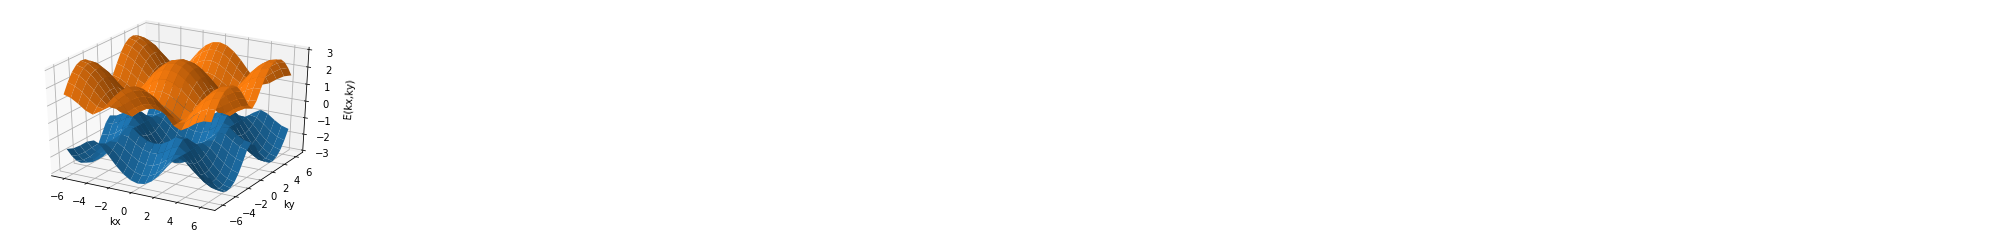

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 18 01:35:46 2019

@author: ssaumya7
"""
from qutip import *
from numpy import *
import numpy as np
#from qutip.latticeclass import UnitCell

############################## Graphene Tight-binding##########################

eps0 = 0.0; eps1 = 0.0;
t = -1.0; 
tNNN =0.15*np.exp((1.j)*np.pi/2.)
tNNNc=tNNN.conjugate()
a1_vec = [sqrt(3)/2,1/2]; a2_vec = [sqrt(3)/2,-1/2]; 

pos0 = [0.0,0,0]; pos1 = [2/3,-1/3];

############ method 1: Adding Two orbitals at once ############################
dimensions=2
number_of_orbitals=2
onsite_energy_array = [eps0, eps1]
position_array = [pos0, pos1]

###  [...[orbital_m,orbital_n,hopping_mn],[orbital_p,orbital_q,hopping_pq]...]
intra_hopping_array=[[0,1,t]]

F1 = Qbasis(onsite_energy_array, position_array ,intra_hopping_array, dimensions, number_of_orbitals)

F1.display_model()
F1.basis_Hamiltonian()


basis_vector_array = [a1_vec, a2_vec]

inter_hopping_vec0 = (0,-1)
inter_hopping_vec1 = (-1,0)
inter_hopping_vec2 = (-1,1)





inter_hopping_array=[  (0,1,t,inter_hopping_vec1) ,  (0,1,t,inter_hopping_vec2) , \
                     (0,0,tNNN,inter_hopping_vec0), (1,1,tNNNc,inter_hopping_vec0), \
                     (0,0,tNNN,inter_hopping_vec1), (1,1,tNNNc,inter_hopping_vec1), \
                     (0,0,tNNN,inter_hopping_vec2), (1,1,tNNNc,inter_hopping_vec2) ]                   
                    



periodic_dimensions = 2

F1crys = Qcrystal(F1, inter_hopping_array, basis_vector_array, periodic_dimensions )
F1crys.display_model()
#F1crys.dispersion()

# must choose kpoints to be an odd integer
k1_start = -2*pi; k1_end = 2*pi; k1points = 21;
kdim1 = [k1_start,k1_end,k1points]
k2_start = -2*pi; k2_end = 2*pi; k2points = 21;
kdim2 = [k2_start,k2_end,k2points]

to_display = 1;
(kxA,kyA,val_ks) = F1crys.dispersion(to_display, kdim1, kdim2 )


#(Hamt,vals,vecs) = F1crys.form_specified_unit_cell(n_units = 10,PBC=0, eig_spectra = 1, eig_vectors = 1 )
#print(Hamt)

